**ML PROBLEM 5.1**

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LassoCV, Lasso
from sklearn import linear_model 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
import warnings
import os
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [36]:
X_train = np.load(os.path.abspath('Xtrain_Classification1.npy'))
y_train = np.load(os.path.abspath('ytrain_Classification1.npy'))
X_test  = np.load(os.path.abspath('Xtest_Classification1.npy'))

In [4]:
print(X_train.shape)
# 6254 elements with 2352 attributes
print(X_test.shape)
print(y_train.shape)


#Checking the imbalance in the data
y_melanoma=[y for y in y_train if y]
y_nevu=[y for y in y_train if not y]

print(len(y_melanoma))
print(len(y_nevu))

(6254, 2352)
(1764, 2352)
(6254,)
896
5358


prof da cadeira diz pa usar transfer learning


podemos só usar classificadores do sklearn tipo mlpclassifier, logistic regression, naive bayes, svm

balanced accuracy: (sensitivity + setificity)/2
sensitivity= True positive/(true positvity + false negativity)
setificity = (true negative)/(true neg + false positive)


Use pytorch neural network - harder but most usefull for harder problems (other options are jax and keras)
output layer - 2 neurons is a classification problem - use softmax (if it was 1 neuron it would be regression)



In [ ]:
#balanced accuracy
def balanced_accuracy(y, y_predicted):
    TN=0
    TP=0
    FP=0
    FN=0
    for i in range(y_predicted.shape[0]):
        if y_predicted(i):
            if y_predicted(i)==y(i):
                TP+=1
            else:
                FP+=1
        else:
            if y_predicted(i)==y(i):
                TN+=1
            else:
                FN+=1
    sensitivity= TP/(TP+FN)
    specificity = TN/(TN/FP)
    balanced_accuracy_val=   (sensitivity+specificity)/2
    return balanced_accuracy_val


**Neural Network**


In [12]:
import tensorflow as tf
import keras
from keras import *

In [13]:
def balanced_accuracy(y_pred, y_true):
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred

    fp = keras.sum(neg_y_true * y_pred)
    tn = keras.sum(neg_y_true * neg_y_pred)
    fn = keras.sum(neg_y_pred*y_true)
    tp = keras.sum(y_true*y_pred)

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    balanced_auc = (specificity + sensitivity)/2

    return balanced_auc

In [14]:
def balanced_accuracy2(y_pred, y_true):
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred

    fp = keras.sum(neg_y_true * y_pred)
    tn = keras.sum(neg_y_true * neg_y_pred)
    fn = keras.sum(neg_y_pred*y_true)
    tp = keras.sum(y_true*y_pred)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    balanced_auc2 = (precision + recall)/2

    return balanced_auc2

In [163]:
### Neural Network
model_keras = keras.Sequential()
model_keras.add(layers.Dense(588, activation="relu", name="Input"))
model_keras.add(layers.Dense(147, activation="relu", name="layer2"))
model_keras.add(layers.Dense(1, activation="sigmoid", name="Output"))

model_keras.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer: use either ADAM or SGDM
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Precision(),keras.metrics.Recall()]
)

In [164]:
from sklearn.preprocessing import StandardScaler

X_val, X_train_sample = X_train[:500].copy(), X_train[500:].copy()
y_val, y_train_sample = y_train[:500].copy(), y_train[500:].copy()

# Create an instance of the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform both training and test data
X_train_sample = scaler.transform(X_train_sample)
X_val = scaler.transform(X_val)

model_trained = model_keras.fit(
    X_train_sample,
    y_train_sample,
    batch_size=64,
    epochs=20,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

Epoch 1/20
90/90 [==============================] - 9s 31ms/step - loss: 0.5071 - precision_27: 0.3589 - recall_27: 0.2625 - val_loss: 0.3782 - val_precision_27: 0.5294 - val_recall_27: 0.1169
Epoch 2/20
90/90 [==============================] - 2s 26ms/step - loss: 0.3271 - precision_27: 0.5242 - recall_27: 0.3040 - val_loss: 0.3280 - val_precision_27: 0.5435 - val_recall_27: 0.3247
Epoch 3/20
90/90 [==============================] - 2s 26ms/step - loss: 0.2938 - precision_27: 0.5693 - recall_27: 0.3211 - val_loss: 0.3176 - val_precision_27: 0.6500 - val_recall_27: 0.1688
Epoch 4/20
90/90 [==============================] - 2s 27ms/step - loss: 0.2755 - precision_27: 0.6738 - recall_27: 0.3858 - val_loss: 0.3074 - val_precision_27: 0.7500 - val_recall_27: 0.2727
Epoch 5/20
90/90 [==============================] - 3s 28ms/step - loss: 0.2621 - precision_27: 0.6460 - recall_27: 0.3944 - val_loss: 0.3373 - val_precision_27: 0.5349 - val_recall_27: 0.2987
Epoch 6/20
90/90 [=================

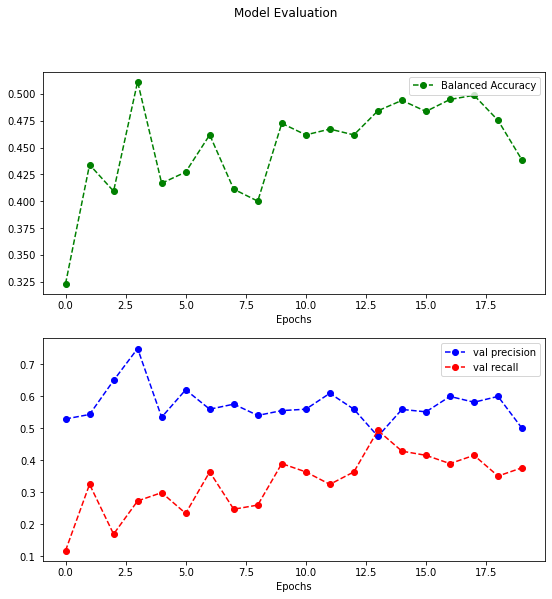

In [165]:
dtf = pd.DataFrame(model_trained.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
fig.suptitle('Model Evaluation')

ax1.plot((dtf.iloc[:,4]+dtf.iloc[:,5])/2,'go--',label='Balanced Accuracy')
ax1.legend()
ax1.set_xlabel('Epochs')

ax2.plot(dtf.iloc[:,4],'bo--',label='val precision')
ax2.plot(dtf.iloc[:,5],'ro--',label='val recall')
ax2.legend()
ax2.set_xlabel('Epochs')

plt.show()

Network using image information


In [ ]:
novo = np.reshape(X_train,(6254,28,28,3))
print(novo)

In [145]:
### Neural Network

model_img= keras.Sequential()
model_img.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)))
model_img.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_img.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_img.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_img.add(layers.Flatten())
#model_img.add(layers.Dense(256, activation='relu'))
model_img.add(layers.Dense(64, activation='relu'))
#model_img.add(layers.Dense(64, activation='relu'))
model_img.add(layers.Dense(1, activation='sigmoid'))


model_img.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer: use either ADAM or SGDM
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Precision(),keras.metrics.Recall()]
)


In [146]:
X_train_img = np.reshape(X_train,(6254,28,28,3)).copy()
X_val, X_train_sample = X_train_img[:500].copy(), X_train_img[500:].copy()
y_val, y_train_sample = y_train[:500].copy(), y_train[500:].copy()

model_trained2 = model_img.fit(
    X_train_sample,
    y_train_sample,
    batch_size=64,
    epochs=20,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

Epoch 1/20
90/90 [==============================] - 6s 47ms/step - loss: 1.3831 - precision_26: 0.2366 - recall_26: 0.1074 - val_loss: 0.3709 - val_precision_26: 0.6250 - val_recall_26: 0.0649
Epoch 2/20
90/90 [==============================] - 5s 56ms/step - loss: 0.3415 - precision_26: 0.5049 - recall_26: 0.0635 - val_loss: 0.3453 - val_precision_26: 0.6000 - val_recall_26: 0.0779
Epoch 3/20
90/90 [==============================] - 5s 53ms/step - loss: 0.3262 - precision_26: 0.5476 - recall_26: 0.1123 - val_loss: 0.3250 - val_precision_26: 0.6087 - val_recall_26: 0.1818
Epoch 4/20
90/90 [==============================] - 5s 54ms/step - loss: 0.3140 - precision_26: 0.6027 - recall_26: 0.1612 - val_loss: 0.3309 - val_precision_26: 0.5758 - val_recall_26: 0.2468
Epoch 5/20
90/90 [==============================] - 5s 53ms/step - loss: 0.3120 - precision_26: 0.5636 - recall_26: 0.2002 - val_loss: 0.3654 - val_precision_26: 0.7778 - val_recall_26: 0.0909
Epoch 6/20
90/90 [=================

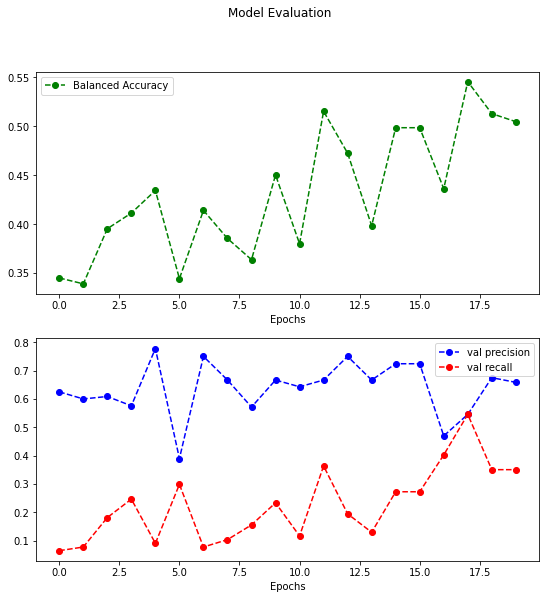

In [162]:
dtf = pd.DataFrame(model_trained2.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
dtf = model_trained2
fig.suptitle('Model Evaluation')

ax1.plot((dtf.iloc[:,4]+dtf.iloc[:,5])/2,'go--',label='Balanced Accuracy')
ax1.legend()
ax1.set_xlabel('Epochs')

ax2.plot(dtf.iloc[:,4],'bo--',label='val precision')
ax2.plot(dtf.iloc[:,5],'ro--',label='val recall')
ax2.legend()
ax2.set_xlabel('Epochs')

plt.show()